# Week_09_Homework

## 1. Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
*  ### a. How do you choose your bin size?
        * I chose my bin size manually, using the df.hist(bins = n) method, and opting for the width to be based on the 
        number of bins dividing up the range between the minimum and maximum value. This was, of course, after I looked 
        at the quarterlies and saw just how many observations were settled in a group of low values. I selected high 
        numbers of bins to return more detail in the smaller values, while the outliers all but disasspeared. 

In [20]:
# Reviews Per Month Distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

belize_df = pd.read_csv ('belize_airbnb_listings.csv')
belize_df['reviews_per_month'].describe()

count    1810.000000
mean        0.538088
std         0.662154
min         0.010000
25%         0.110000
50%         0.275000
75%         0.700000
max         5.920000
Name: reviews_per_month, dtype: float64

<AxesSubplot:>

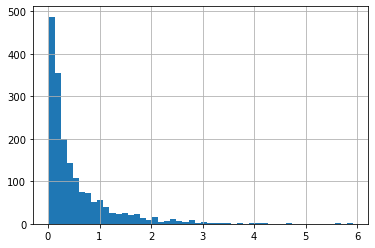

In [21]:
belize_df['reviews_per_month'].hist(bins = 50)

In [22]:
# Number of reviews
import numpy as np

belize_df = pd.read_csv ('belize_airbnb_listings.csv')
belize_df['number_of_reviews'].describe()

count    2796.000000
mean       14.453505
std        30.327768
min         0.000000
25%         0.000000
50%         2.000000
75%        13.000000
max       316.000000
Name: number_of_reviews, dtype: float64

<AxesSubplot:>

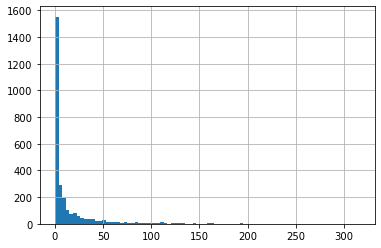

In [23]:
belize_df['number_of_reviews'].hist(bins = 84)

# 2. Create a box and whisker plot for availability_365. What does this show you?
* ### It shows me that the average availability for any property is around 350 days. 
* ### 25% of the properties are 364 and above, while 75% are available for around 225 days or more (this is not looking at the statistics table, but at the boxplot alone. 
* ### A vast amount of the properties have at least a few days of availablity, likely a week, while the outliers have between no days and only a couple of days of availability. 

In [16]:
# Number of reviews
import numpy as np

belize_df = pd.read_csv ('belize_airbnb_listings.csv')
belize_df['availability_365'].describe()

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad83282250>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad83282910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad83272eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad83282fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad8328e370>],
 'means': []}

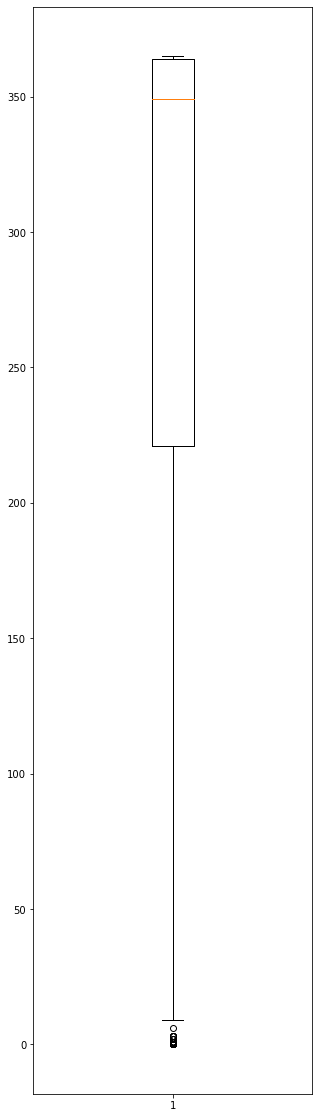

In [24]:
fig, ax = plt.subplots(figsize = (5,20))
ax.boxplot(belize_df['availability_365'])

## 3.	What is the probability that the price for an Airbnb is under $50?
*  ### 0.0175 or 1.7% or 2 out of 100
        
*  ### a.  How do you choose your bin size? What do you notice about these records? Hint: look at the other columns.
            * Average price of Airbnb properties is about $225, but ranges within $150 to $400
            * Average price of Airbnb properties under $50 is about $40, but ranges between $25 to $49
            * There are only 49 available properties for rental under $50
                * None of the under $50 group were hotel rooms
            * Average Minimum Night stay is 2 days, but for Under $50, it's only 1
        
*  ###  b.	What distribution does this data most closely fit?
            * Right skew data distribution


In [18]:
# Probability that the price for an Airbnb is Under $50 - 1.8%  or nearly 2 out of 100
properties = belize_df['price'].count()
under_50 = belize_df['price'][belize_df['price'] < 50.0].count()
probability = under_50/properties

print(properties)
print(under_50)
print(probability)

2796
49
0.017525035765379112


In [19]:
belize_df['price'].describe()

count     2796.000000
mean       357.102289
std        563.124825
min         20.000000
25%        135.000000
50%        220.000000
75%        394.250000
max      11788.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

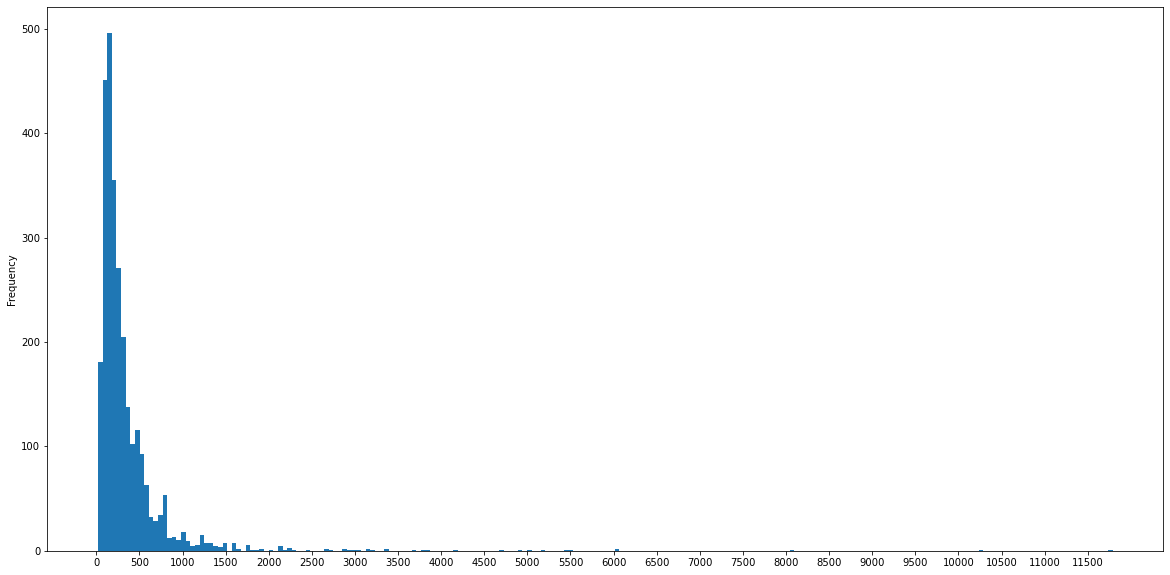

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
plt.xticks(np.arange(0, 12000, 500))
belize_df['price'].plot.hist(bins = 220)

In [27]:
# All available Room Types - 2796 properties available

belize_df.groupby(['room_type'])['id'].count()

room_type
Entire home/apt    1787
Hotel room          190
Private room        799
Shared room          20
Name: id, dtype: int64

In [28]:
# All available room types probabilities 
#   Entire Home/Apartment - 63.9%
#   Hotel room            -  6.8%
#   Private Room          - 28.6%
#   Shared Room           -  0.7%

all_home_apt = belize_df['room_type'][belize_df['room_type'] == 'Entire home/apt'].count()
all_hotel = belize_df['room_type'][belize_df['room_type'] == 'Hotel room'].count()
all_pvt_room = belize_df['room_type'][belize_df['room_type'] == 'Private room'].count()
all_shared_room = belize_df['room_type'][belize_df['room_type'] == 'Shared room'].count()

print("Probability of an Entire home or Apartment ",all_home_apt/properties)
print("Probability of a Hotel rooom ",all_hotel/properties)
print("Probability of a Private room ",all_pvt_room/properties)
print("Probability of a Shared room ",all_shared_room/properties)

Probability of an Entire home or Apartment  0.6391273247496424
Probability of a Hotel rooom  0.06795422031473533
Probability of a Private room  0.2857653791130186
Probability of a Shared room  0.00715307582260372


{'whiskers': [<matplotlib.lines.Line2D at 0x2ad837154c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad83715b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad83715160>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad8371e280>],
 'fliers': [],
 'means': []}

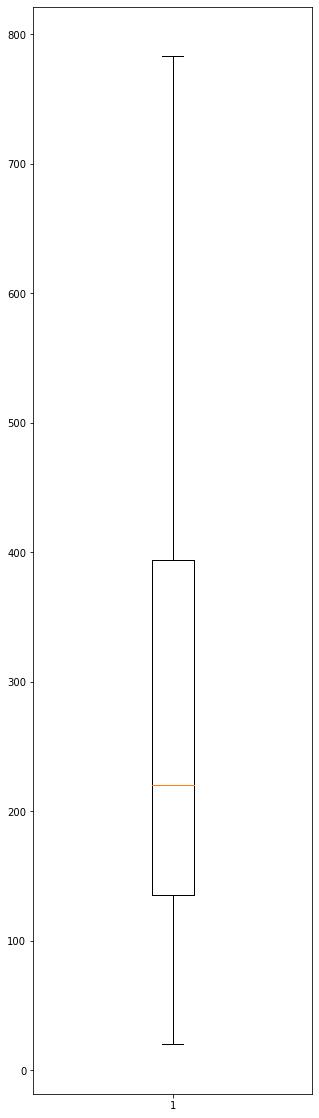

In [29]:
# Boxplot of Price Average without Outliers

fig, ax = plt.subplots(figsize = (5,20))
ax.boxplot(belize_df['price'], 0, '')

In [30]:
# Room Types available for UNDER $50 - Note: only 40 places available

bnb_under_50.groupby(['room_type'])['id'].count()

NameError: name 'bnb_under_50' is not defined

In [32]:
# Probabilities for getting a particular room type UNDER $50 
#   Entire Home/Apartment - 26.5%
#   Hotel room            -  0.0%
#   Private Room          - 55.1%
#   Shared Room           - 18.4%

bnb_under_50 = belize_df.loc[belize_df["price"] < 50 ]
under_50_home_apt = bnb_under_50['room_type'][bnb_under_50['room_type'] == 'Entire home/apt'].count()
under_50_pvt_room = bnb_under_50['room_type'][bnb_under_50['room_type'] == 'Private room'].count()
under_50_shared_room = bnb_under_50['room_type'][bnb_under_50['room_type'] == 'Shared room'].count()
under_50_properties = bnb_under_50['id'].count()

print("Probability of an Entire home or Apartment $50 or under ",under_50_home_apt/under_50_properties)
print("Probability of a Private room $50 or under ",under_50_pvt_room/under_50_properties)
print("Probability of a Shared room $50 or under ",under_50_shared_room/under_50_properties)

Probability of an Entire home or Apartment $50 or under  0.2653061224489796
Probability of a Private room $50 or under  0.5510204081632653
Probability of a Shared room $50 or under  0.1836734693877551


{'whiskers': [<matplotlib.lines.Line2D at 0x2ad83781a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad83790130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad837816d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad83790730>],
 'fliers': [],
 'means': []}

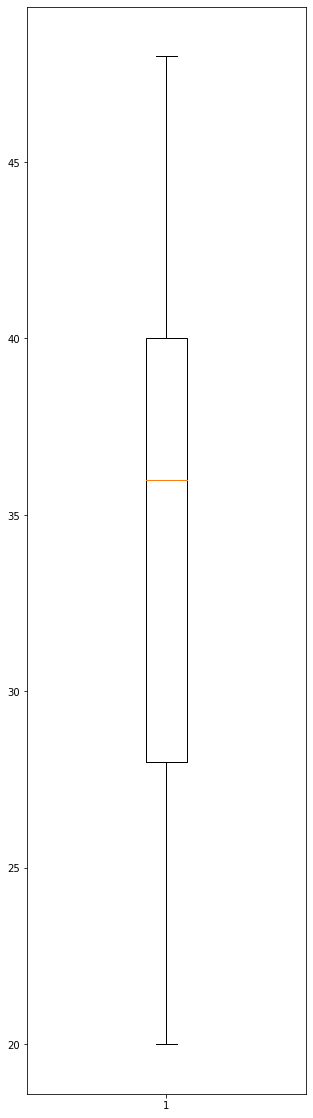

In [33]:
# Boxplot of Properties Under $50 price average without Outliers

bnb_under_50 = belize_df.loc[belize_df["price"] < 50 ]
fig, ax = plt.subplots(figsize = (5,20))
ax.boxplot(bnb_under_50['price'], 0, '')

In [34]:
# A look at the minimum night stay for an AirBnb

belize_df.groupby(["room_type","minimum_nights"])["id"].count()

room_type        minimum_nights
Entire home/apt  1                 577
                 2                 604
                 3                 445
                 4                  67
                 5                  38
                 6                  11
                 7                  24
                 10                  1
                 14                  2
                 28                  5
                 30                 10
                 90                  1
                 180                 2
Hotel room       1                 149
                 2                  25
                 3                  12
                 4                   1
                 7                   3
Private room     1                 542
                 2                 179
                 3                  60
                 4                   3
                 7                  10
                 14                  1
                 28             

In [35]:
# A look at the minimum night stay for an AirBnb Under $50

bnb_under_50 = belize_df.loc[belize_df["price"] < 50 ]
bnb_under_50.groupby(["room_type","minimum_nights"])["id"].count()

room_type        minimum_nights
Entire home/apt  1                  6
                 2                  2
                 28                 2
                 30                 3
Private room     1                 17
                 2                  4
                 7                  6
Shared room      1                  8
                 2                  1
Name: id, dtype: int64

In [36]:
#A look at the statistics for minimum night stay for an AirBnb

belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

In [37]:
#A look at the statistics for minimum night stay for an AirBnb Under $50

bnb_under_50['minimum_nights'].describe()

count    49.000000
mean      4.755102
std       8.555044
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      30.000000
Name: minimum_nights, dtype: float64

In [38]:
#A look at the statistics for number of reviews for an AirBnb

belize_df['number_of_reviews'].describe()

count    2796.000000
mean       14.453505
std        30.327768
min         0.000000
25%         0.000000
50%         2.000000
75%        13.000000
max       316.000000
Name: number_of_reviews, dtype: float64

In [39]:
#A look at the statistics for number of reviews for an AirBnb Under $50

bnb_under_50['number_of_reviews'].describe()

count     49.000000
mean      15.653061
std       25.304439
min        0.000000
25%        1.000000
50%        6.000000
75%       16.000000
max      126.000000
Name: number_of_reviews, dtype: float64

## 4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
*  ### a.	Why sample variance and not population variance?
        * Sample Variance data on only a random segment of a population, where Population Variance is getting EVERYONE 
        in the population that is being studied. Example: surveying a select number of grocery store customers vs.
        surveying EVERY grocery store customer.
        
*  ###     b.	What is your takeaway for each metric?
        * Sample variance is best for working with a massive body of data, and wanting to NOT crash a computer (or brain)
        * Population variance is great for small bodies of data
        
*  ###     c.	What are the scales of measurement for each of these values? 
                * id = nominal
                * latitude = nominal
                * longitude = nominal
                * price = ordinal
                * minimum_nights = ordinal
                * number_of_reviews = ordinal
                * revies_per_month = ordinal
                * calculated_host_listings_count = ordinal
                * availability_365 = ordinal


In [13]:
belize_df.var()

id                                1.661428e+14
host_id                           1.036327e+16
latitude                          2.888413e-01
longitude                         1.473608e-01
price                             3.171096e+05
minimum_nights                    3.214712e+01
number_of_reviews                 9.197735e+02
reviews_per_month                 4.384482e-01
calculated_host_listings_count    2.674046e+03
availability_365                  1.454861e+04
dtype: float64

In [14]:
belize_df.std()

id                                1.288964e+07
host_id                           1.018001e+08
latitude                          5.374396e-01
longitude                         3.838760e-01
price                             5.631248e+02
minimum_nights                    5.669843e+00
number_of_reviews                 3.032777e+01
reviews_per_month                 6.621542e-01
calculated_host_listings_count    5.171118e+01
availability_365                  1.206176e+02
dtype: float64

## 5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
            * 39.5% 
*  ### a.	360 days or less?
            * 61.6%
*  ### b.	What distribution does this data most closely fit?
            * Left Skew


In [43]:
total_listings = belize_df['availability_365'].count()
equal_more_360 = belize_df['availability_365'][belize_df['availability_365'] >= 360].count()

print("Total Listings ",total_listings)
print("Listings available 360 days or more ", equal_more_360)
print("Percentage of properties available 360 days or more ", equal_more_360/total_listings *100)

Total Listings  2796
Listings available 360 days or more  1105
Percentage of properties available 360 days or more  39.52074391988555


In [44]:
total_listings = belize_df['availability_365'].count()
equal_less_360 = belize_df['availability_365'][belize_df['availability_365'] <= 360].count()

print("Total Listings ",total_listings)
print("Listings available 360 days or more ", equal_less_360)
print("Percentage of properties available 360 days or less ", equal_less_360/total_listings *100)

Total Listings  2796
Listings available 360 days or more  1721
Percentage of properties available 360 days or less  61.55221745350501


## 6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?
*  ### 1 night

In [46]:
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64